In [115]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
#import project_code as pc
import ipywidgets as widgets
from IPython.display import display, clear_output

In [116]:
#funkcja import pliku
def f_file_import(name:str):
    return pd.read_csv(name)

In [117]:
#Zaimportowanie pliku z pc
df_clean = f_file_import('df_clean.csv')

In [118]:
#definicja development
#funkcja agregująca dane do nowego DF
def aggregate_fun(df, agg_list:list, measure:str):
    agg_df = df.groupby(agg_list)[measure].agg(['count',sum,'mean', 'median']).reset_index()
    agg_df.rename(columns= {'count':'count_x', 'sum':'sum_x', 'mean':'mean_x', 'median':'median_x'}, inplace=True)
    return agg_df
    #['country','main_category'] 'usd_pledged_real'

In [172]:
#funkcja bar plot z procentami
def barplot_pct(df, lista_2_elementy:list , kolor='pastel', x_label:str='x', y_label:str='y', title_fig:str='Tytuł'):
    #agregujemy po 2 zmiennych, otrzymujemy count, sum, mean, median
    df_new = aggregate_fun(df, lista_2_elementy, 'ID' )
        #['country', 'main_category']
    
    #zmieniamy nazwę w nowo utworzonym DF, bo wysypuje się na nazwach typu count
    df_new.rename(columns= {'count_x':'count_y', 'sum_x':'sum_y', 'mean_x':'mean_y', 'median_x':'median_y'}, inplace=True)

    #agregujemy drugiego DF po 1 zmiennej - będziemy brać z tego sumę
    df_new_1 = aggregate_fun(df_new, lista_2_elementy[1], 'count_y')
        #['main_category']

    #zmieniamy nazwę drugiego DF, bo wysypuje się na nazwach typu count
    #df_new_1.rename(columns= {'count':'count_x', 'sum':'sum_x', 'mean':'mean_x', 'median':'median_x'}, inplace=True)

    #merge'ujemy powyższe DFy, z pierwszego bierzemy count_y, z drugiego sum_x,
    # merge jako inner join, łączenie po XXXXXX
    df_new_2 = pd.merge(df_new[[lista_2_elementy[0], lista_2_elementy[1], 'count_y']],
    df_new_1[[lista_2_elementy[1],'sum_x']], how='inner', on=lista_2_elementy[1])
        #'country','main_category'
        #'main_category' x2

    #Tworzymy nową kolumnę procent
    df_new_2['pct'] = df_new_2['count_y']/df_new_2['sum_x'] * 100

    #Odwołanie do funkcji tworzącej wykres
    bar_plot_2_var(df_new_2, lista_2_elementy[1], lista_2_elementy[0],'pct', kolor,2,8, x_label=x_label, y_label=y_label, title_fig=title_fig);
        #'main_category' 'country'
    

#agg_country_main_category.rename(columns= {'count':'count_y', 'sum':'sum_y', 'mean':'mean_y', 'median':'meadian_y'}, inplace=True)
#agg_country_main_category.head()

In [120]:
#definicja development
#funkcja wykres słupkowy - liczebność - dwie zmienne - col x
def bar_plot_2_var(df, var_col:str, var_x:str, var_y:str, palette_list:list, column_wrap:int =3, height_value:float = 4, x_label:str='x', y_label:str='y', title_fig:str='Tytuł'):
    g = sns.catplot(data = df, col = var_col , x = var_x, y=var_y, kind = 'bar', height = height_value, col_wrap=column_wrap, palette = palette_list,sharex = False)
    g.set_titles('{col_name}')
    g.set_axis_labels(x_label, y_label)
    g.fig.suptitle(title_fig,y=1, fontsize=16, fontweight='semibold');
    

In [121]:
#definicja development
#funkcja wykres słupkowy - liczebność - dwie zmienne - col x
def count_plot_col(df, var1:str, var2:str,column_wrap:int =3, height_value:float = 4,  x_label:str='x', y_label:str='y', title_fig:str='Tytuł'):
    g = sns.catplot(data = df, col = var1 , x = var2,  kind = 'count', height = height_value, col_wrap=column_wrap, sharex=False)
    g.set_titles('{col_name}');
    g.set_axis_labels(x_label, y_label)
    g.fig.suptitle(title_fig,y=1.01, fontsize=16, fontweight='semibold');
    #'country' 'main_category' 'count'
    #y = measure ,

In [122]:
#funkcja 3 zmienne - po aggregujących  
def bar_plot_3_var(df, var_col:str, var_x:str, var_y:str, hue_var:str,zmienna_ilosciowa:str, palette_list:list, column_wrap:int =3, height_value:float = 4, x_label:str='x', y_label:str='y', title_fig:str='Tytuł'):
    df_new = aggregate_fun(df, [var_x, var_col, hue_var], zmienna_ilosciowa )
    g = sns.catplot(data = df_new, col = var_col , x = var_x, y = var_y, hue = hue_var, kind = 'bar', height = height_value, col_wrap = column_wrap, palette = palette_list, sharex = False)
    g.set_titles('{col_name}')
    g.set_axis_labels(x_label, y_label)
    g.fig.suptitle(title_fig,y=1, fontsize=16, fontweight='semibold');

In [123]:
#funkcja 3 zmienne - bez agregacji   
def bar_plot_3_var_no_agg(df, var_col:str, var_x:str, var_y:str, hue_var:str, palette_list:list, column_wrap:int =3, height_value:float = 4, x_label:str='x', y_label:str='y', title_fig:str='Tytuł'):
    g = sns.catplot(data = df, col = var_col , x = var_x, y = var_y, hue = hue_var, kind = 'bar', height = height_value, col_wrap = column_wrap, palette = palette_list, sharex = False)
    g.set_titles('{col_name}')
    g.set_axis_labels(x_label, y_label)
    g.fig.suptitle(title_fig,y=1.005, fontsize=16, fontweight='semibold');

In [160]:
#funkcja wykres słupkowy - liczebność - jedna zmienna
def bar_plot_1_var(name, group_var:str, size:tuple = (10,6), colors = ['r', 'g'], alph=1, x_label:str='x', y_label:str='y', title_fig:str='Tytuł'):
   g = name.groupby(group_var)[group_var].count().sort_values(ascending = False).plot(kind = 'bar', figsize = size, color=colors,alpha=alph)
   g.set(xlabel=x_label, ylabel=y_label, title=title_fig)

   

In [162]:
#funkcja wykres słupkowy - liczebność - jedna zmienna - dla dat
def bar_plot_1_var_date(name, group_var:str, size:tuple = (10,6), x_label:str='x', y_label:str='y', title_fig:str='Tytuł'):
    g = name.groupby(group_var)[group_var].count().plot(kind = 'bar', figsize = size)
    g.set(xlabel=x_label, ylabel=y_label, title=title_fig);

In [167]:
#funkcja wykres słupkowy - średnia - jedna zmienna + zmienna grupowana
# var1 - zmienna grupująca, var2 - zmienna grupowana
def bar_plot_1_var_mean(df, group_var:str, groupped_var:str, x_label:str='x', y_label:str='y', title_fig:str='Tytuł'):
    g = df.groupby(group_var)[groupped_var].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,8))
    g.set(xlabel=x_label, ylabel=y_label, title=title_fig);

In [127]:
#definicja development
#funkcja sortująca
def sorting_values(df_agg, value_by:str = 'mean', sorting_var:bool = False):
    return df_agg.sort_values(by =value_by, ascending= sorting_var).reset_index()

In [170]:
#ta funkcja jest chyba do wywalenia bo nie korzystamy z niej
#definicja development
#funkcja wykres słupkowy - średnia - dwie zmienne
# var1 - zmienna grupująca, var2 - zmienna grupowana
def f_barplot_2_var_mean(name, var1:str, var2:str, size:tuple = (10,6)):
    name.groupby(var1)[var2].mean().sort_values(ascending=False).plot(kind='bar', figsize = size);

In [171]:
#funkcja filtrująca - 
#df_zadana_kwota = df_clean.query('usd_goal_real < 10000')
def filter_lower_equal(df, x, var_bar_plot:list, color='pastel', x_label:str='x', y_label:str='y', title_fig:str='Tytył'):
    df_zadana_kwota = df[df.usd_goal_real <= x]
    g = barplot_pct(df_zadana_kwota, var_bar_plot, color, x_label, y_label, title_fig)
    #var_bar_plot = ['state','main_category']

In [130]:
#funkcja tworząca liste unikalnych wartości do widgetów
def unique_value_list(df, col_var:str):
    return list(df[col_var].unique())

In [131]:
#funkcja tworząca liste unikalnych wartości do widgetów sortująca 
def unique_value_list_sorted(df, col_var:str):
    return sorted(list(df[col_var].unique()))
    

In [132]:
#funkcja definicja widgetu 
def widget_def(lista:list, descr:str ):
    return widgets.SelectMultiple(
    options=lista,
    value=[lista[0]],
    rows=10,
    description=descr,
    disabled=False)

In [133]:
def widget_layout(widget1, widget2):
    layout = widgets.Layout(display='flex',
         justify_content='space-between',
         align_items='center',                
         flex_flow='row',
         border='solid green',
         width='70%',
         style= {'description_width': 'initial'} )
    return widgets.Box(children=[widget1, widget2], layout=layout)

In [134]:
#funkcja bar plot z procentami
def barplot_pct_3_var(df, lista_3_elementy:list, x_label:str='x', y_label:str='y', title_fig:str='Tytuł'):
    #agregujemy po 2 zmiennych, otrzymujemy count, sum, mean, median
    df_new = aggregate_fun(df, lista_3_elementy, 'ID' )
        #['country', 'main_category']
    
    #zmieniamy nazwę w nowo utworzonym DF, bo wysypuje się na nazwach typu count
    df_new.rename(columns= {'count_x':'count_y', 'sum_x':'sum_y', 'mean_x':'mean_y', 'median_x':'median_y'}, inplace=True)

    #agregujemy drugiego DF po 2 elementach - będziemy brać z tego sumę
    df_new_1 = aggregate_fun(df_new, lista_3_elementy[0:2], 'count_y')
        #['main_category']

    #zmieniamy nazwę drugiego DF, bo wysypuje się na nazwach typu count
    #df_new_1.rename(columns= {'count':'count_x', 'sum':'sum_x', 'mean':'mean_x', 'median':'median_x'}, inplace=True)

    #merge'ujemy powyższe DFy, z pierwszego bierzemy count_y, z drugiego sum_x,
    # merge jako inner join, łączenie po XXXXXX
    df_new_2 = pd.merge(df_new[[lista_3_elementy[0], lista_3_elementy[1],lista_3_elementy[2], 'count_y']],
    df_new_1[[lista_3_elementy[0],lista_3_elementy[1],'sum_x']], how='inner', on=lista_3_elementy[0:2])
        #'country','main_category'
        #'main_category' x2

    #Tworzymy nową kolumnę procent
    df_new_2['pct'] = df_new_2['count_y']/df_new_2['sum_x'] * 100

    #Odwołanie do funkcji tworzącej wykres
    bar_plot_3_var_no_agg(df_new_2,'main_category', 'duration', 'pct', 'state', ['r', 'g'], 1, 15.0, x_label=x_label, y_label=y_label, title_fig=title_fig)
        #'main_category' 'country'
    

#agg_country_main_category.rename(columns= {'count':'count_y', 'sum':'sum_y', 'mean':'mean_y', 'median':'meadian_y'}, inplace=True)
#agg_country_main_category.head()

In [135]:
#tworzymy listy
list_main_cat = unique_value_list(df_clean, 'main_category')
list_country = unique_value_list(df_clean, 'country')
list_launched_year = unique_value_list_sorted(df_clean, 'launched_year')

In [136]:
# widgety
widget_main_cat = widget_def(list_main_cat, 'Kategoria')
widget_country = widget_def(list_country, 'Kraj' )
widget_launched_year = widget_def(list_launched_year, 'Rok uruchomienia zbiórki' )
widget_days = widgets.IntRangeSlider(
    value=[1, 60],
    min=1,
    max=60,
    step=1,
    description='Czas trwania zbiórki:',
    style={'description_width':'initial'},
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
widget_value = widgets.IntText(description='Cel zbiórki <=')

## Podsumowania 

##### Rozkład liczby zbiórek na rok założenia zbiórki 

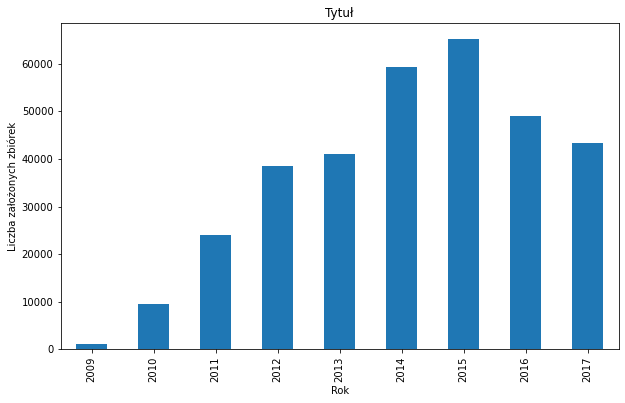

In [163]:
year_count = bar_plot_1_var_date(df_clean, 'launched_year', x_label='Rok', y_label='Liczba założonych zbiórek', title_fig='Tytuł')

##### Rozkład liczby zakładanych zbiórek na miesiące

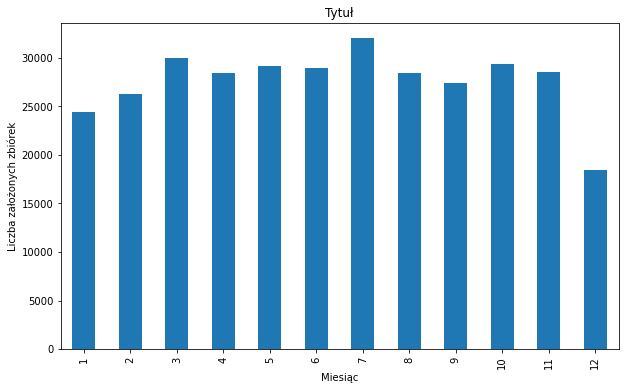

In [164]:
year_count = bar_plot_1_var_date(df_clean, 'launched_month', x_label='Miesiąc', y_label='Liczba założonych zbiórek', title_fig='Tytuł')

##### Rozkład liczby zakładanych zbiórek w krajach

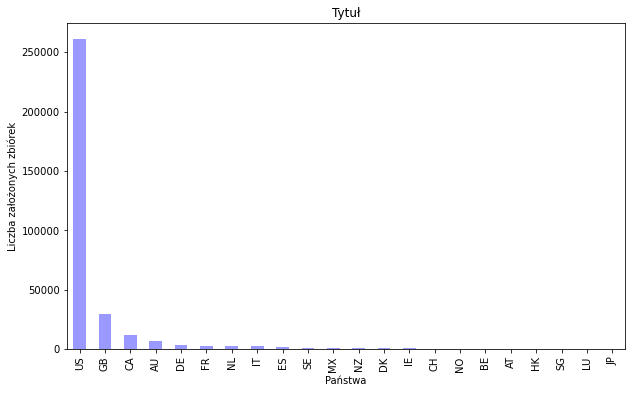

In [161]:
country_count = bar_plot_1_var(df_clean, 'country',colors='b',alph=0.4, x_label='Państwa', y_label='Liczba założonych zbiórek', title_fig='Tytuł')

In [140]:
widget_country

SelectMultiple(description='Kraj', index=(0,), options=('GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', …

# TU ZMIENIC KOLOR BO POKAZUJE CZERWONY LUB ZIELONY 

Button(description='Odśwież', style=ButtonStyle())

Output()

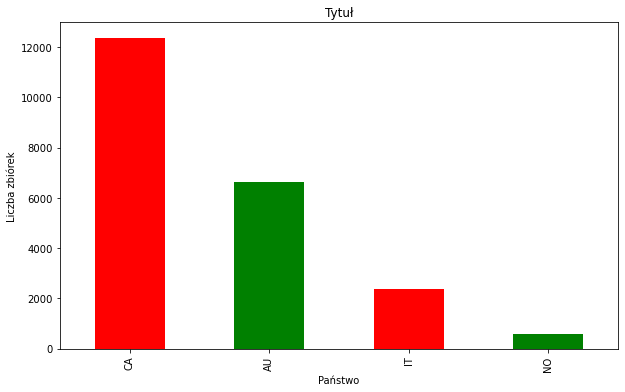

In [169]:


# liczba zbiórek w danym kraju
refresh_button = widgets.Button(description="Odśwież")
output = widgets.Output()


def refresh(b):
    clear_output()
    display(refresh_button, output)
    #tworzę listę wybranych kategorii
    list_wdg_main_category = list(widget_country.value)
    #tworzę listę wybranych lat
    #list_wdg_launched_year = list(wdg_year_main_category_count__launched_year.value)
    #Filtruję DF wg wybranych kategorii
    df_new = df_clean[( df_clean['country'].isin(list_wdg_main_category) )] #& ( df_clean['launched_year'].isin(list_wdg_launched_year) )]
    #Tworzę wykres na podstawie nowego DF
    return bar_plot_1_var(df_new, 'country',x_label='Państwo', y_label='Liczba zbiórek', title_fig='Tytuł' )

display(refresh_button, output)
refresh_button.on_click(refresh)

##### Popularność kategorii 

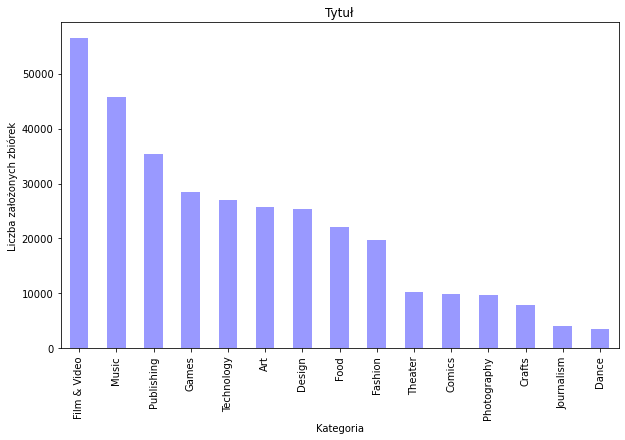

In [165]:
main_category_count = bar_plot_1_var(df_clean, 'main_category',colors = 'b',alph=0.4, x_label='Kategoria', y_label='Liczba założonych zbiórek', title_fig='Tytuł')

##### Rozkład udanych i nieudanych zbiórek

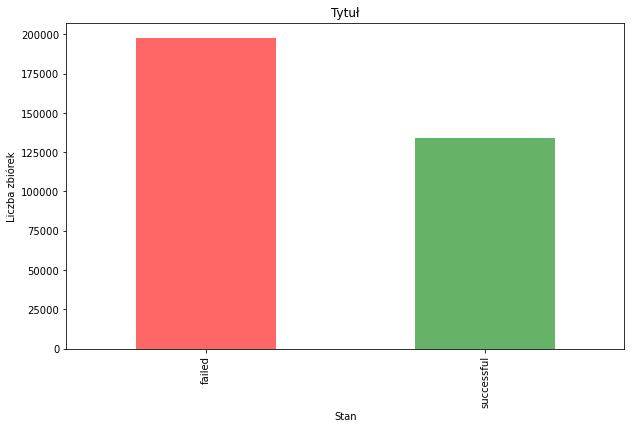

In [166]:
state_count = bar_plot_1_var(df_clean, 'state',alph=0.6, x_label='Stan', y_label='Liczba zbiórek', title_fig='Tytuł')

##### Średni hajs zebrany na kategoriach

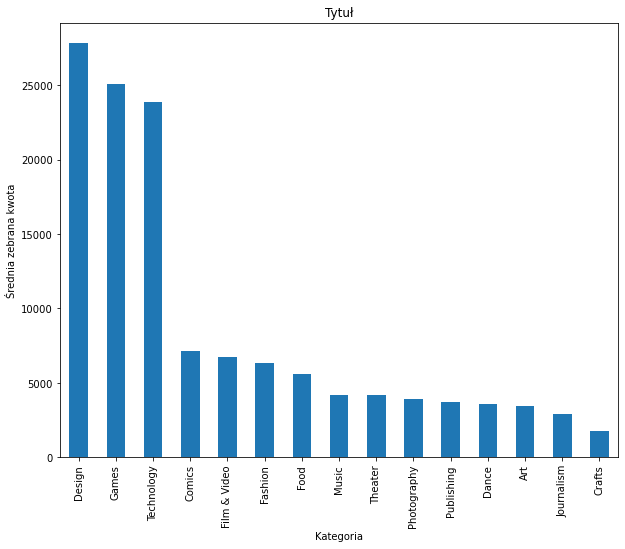

In [168]:
main_category_usd_pledged_real_mean = bar_plot_1_var_mean(df_clean, 'main_category', 'usd_pledged_real', x_label='Kategoria', y_label='Średnia zebrana kwota', title_fig='Tytuł')

***

##### Zbiórki odnoszące sukces poniżej danej kwoty

In [145]:
#da = filter_lower_equal(df_clean, 15000, ['state','main_category'])

In [146]:
widget_maincat_value = widget_layout(widget_main_cat, widget_value)
widget_maincat_value

Box(children=(SelectMultiple(description='Kategoria', index=(0,), options=('Publishing', 'Film & Video', 'Musi…

In [147]:
refresh_button = widgets.Button(description="Odśwież")
output = widgets.Output()


def refresh(b):
    clear_output()
    display(refresh_button, output)
    #tworzę listę wybranych kategorii
    value_max = widget_value.value
    #tworzę listę wybranych lat
    list_wdg_main_category = list(widget_main_cat.value)
    #Filtruję DF wg wybranych kategorii
    df_new = df_clean[( df_clean['main_category'].isin(list_wdg_main_category))]
    #Tworzę wykres na podstawie nowego DF    
    return filter_lower_equal(df_new, value_max, ['state','main_category'], ['r','b'], 'stan', '[%]', 'To jest nowy tytuł')

display(refresh_button, output)
refresh_button.on_click(refresh)

Button(description='Odśwież', style=ButtonStyle())

Output()

***

##### Udane i nieudane zbiórki rozkład procentowy

f:\Anaconda\envs\projekt_python\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)
f:\Anaconda\envs\projekt_python\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


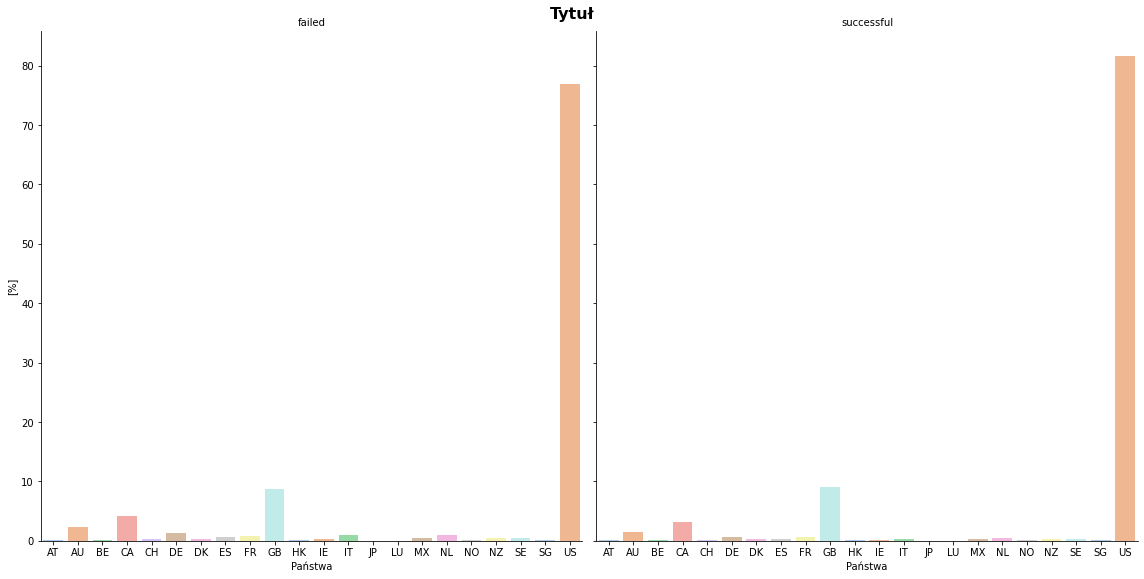

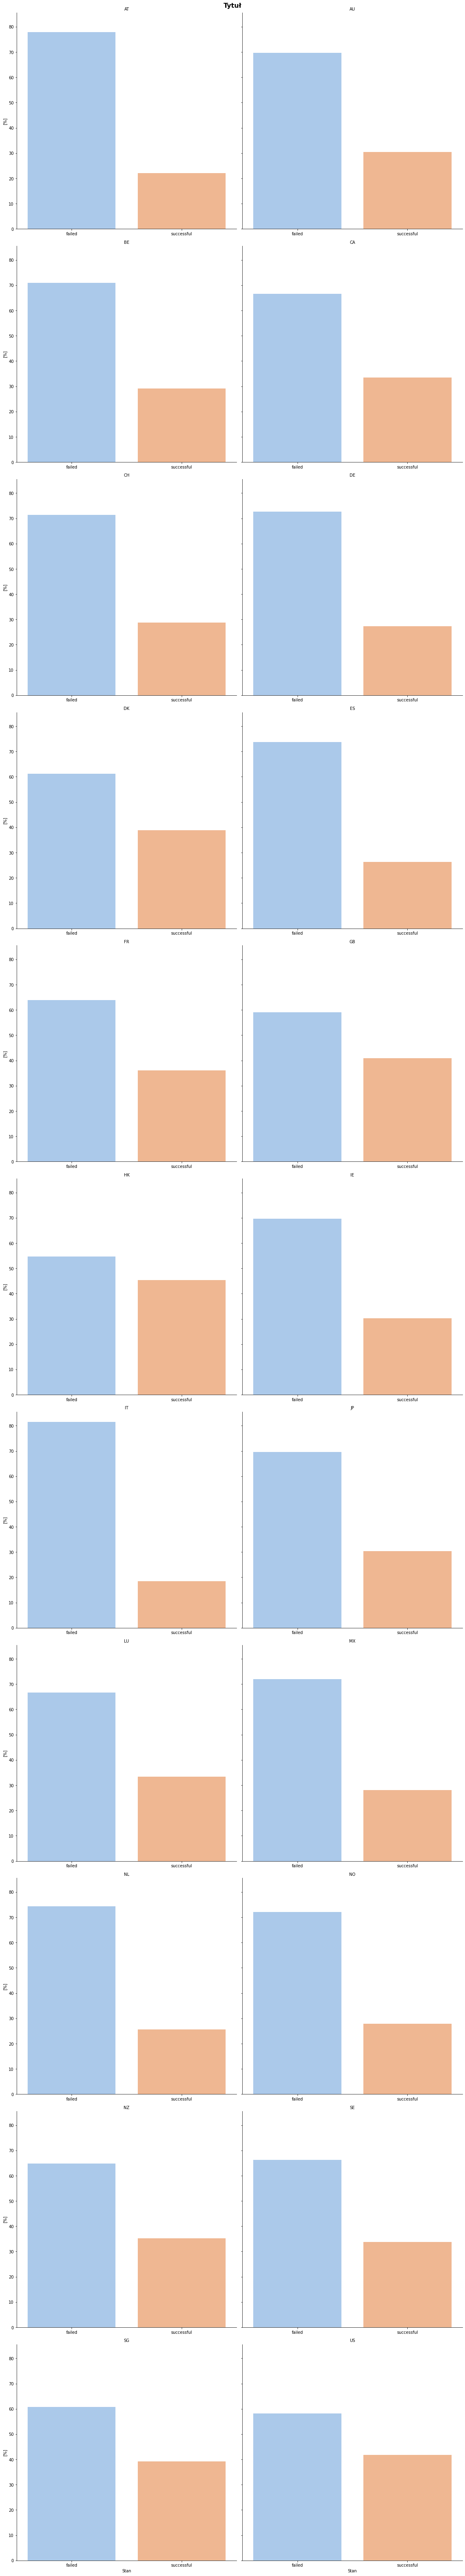

In [148]:
country_state_barplot_pct = barplot_pct(df_clean,['country', 'state'], x_label='Państwa', y_label='[%]', title_fig='Tytuł')


country_state_barplot_pct = barplot_pct(df_clean,['state', 'country'], x_label='Stan', y_label='[%]', title_fig='Tytuł')


In [149]:
widget_country

SelectMultiple(description='Kraj', index=(0,), options=('GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', …

In [150]:
# liczba zbiórek w danym kraju
refresh_button = widgets.Button(description="Odśwież")
output = widgets.Output()


def refresh(b):
    clear_output()
    display(refresh_button, output)
    #tworzę listę wybranych kategorii
    list_wdg_country = list(widget_country.value)
    #tworzę listę wybranych lat
    #list_wdg_launched_year = list(wdg_year_main_category_count__launched_year.value)
    #Filtruję DF wg wybranych kategorii
    df_new = df_clean[( df_clean['country'].isin(list_wdg_country) )] #& ( df_clean['launched_year'].isin(list_wdg_launched_year) )]
    #Tworzę wykres na podstawie nowego DF
    barplot_pct(df_new,['country', 'state'], x_label='Państwa',y_label='%', title_fig='Tytuł')
    barplot_pct(df_new,['state', 'country'], ['#ed1515','g'], x_label='stan',y_label='%', title_fig='Tytuł')

display(refresh_button, output)
refresh_button.on_click(refresh)

Button(description='Odśwież', style=ButtonStyle())

Output()

##### Średnia kwota celu zbiórki dla krajów w podziale na udane i nieudane zbiórki

In [151]:
bar_plot_2_var(country_state_usd_goal_real_df, 'state', 'country', 'mean_x', 'pastel',25)

NameError: name 'country_state_usd_goal_real_df' is not defined

In [ ]:
widget_country

SelectMultiple(description='Kraj', index=(2, 3, 4, 5), options=('GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE'…

Button(description='Odśwież', style=ButtonStyle())

Output()

f:\Anaconda\envs\projekt_python\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


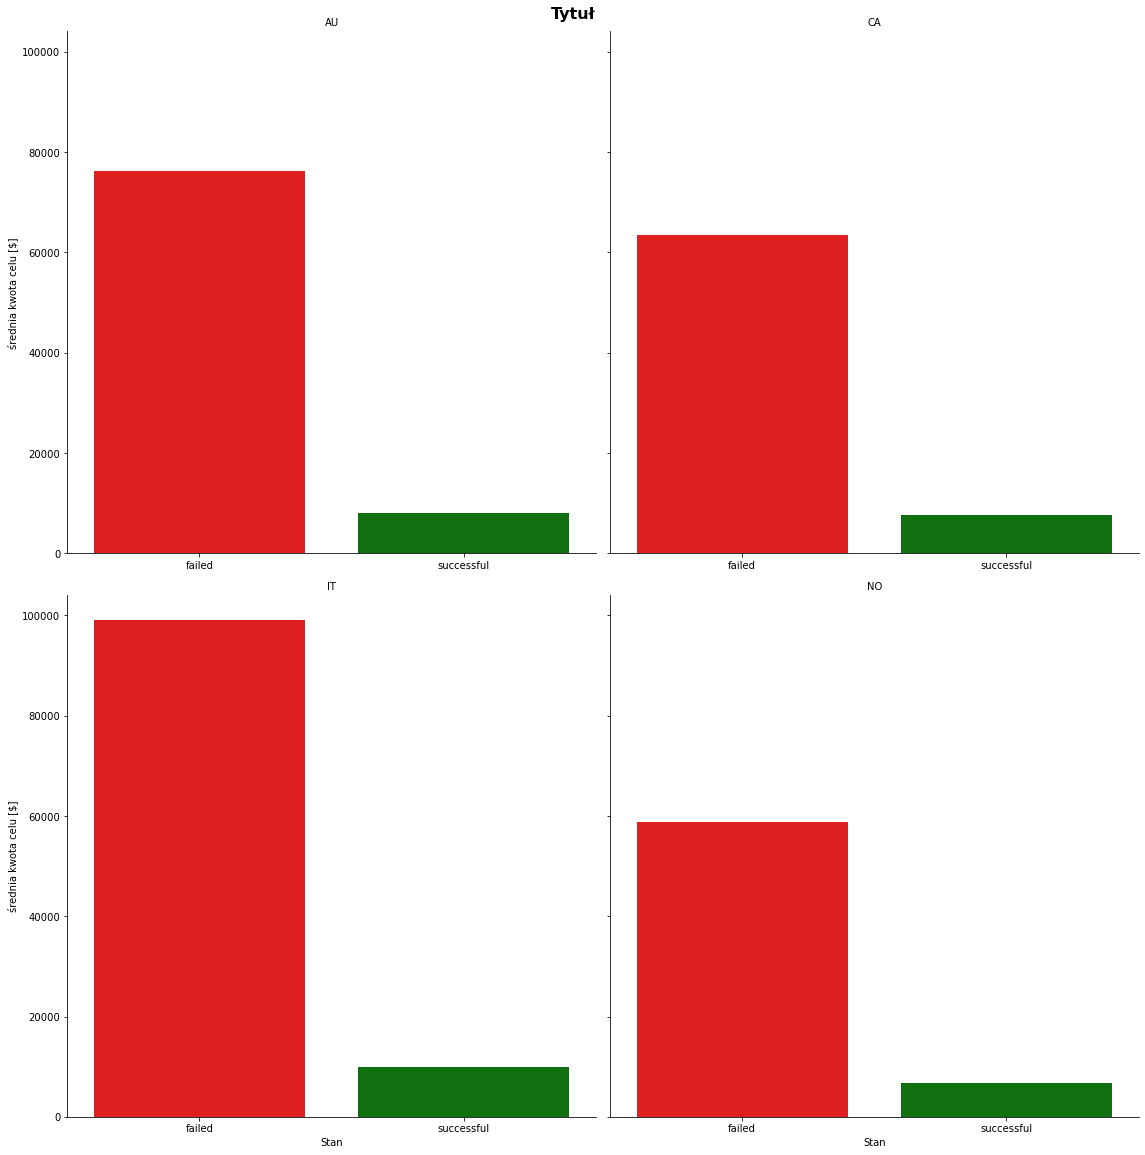

In [ ]:
refresh_button = widgets.Button(description="Odśwież")
output = widgets.Output()


def refresh(b):
    clear_output()
    display(refresh_button, output)
    #tworzę listę wybranych kategorii
    list_wdg_main_category = list(widget_country.value)
    #tworzę listę wybranych lat
    #list_wdg_launched_year = list(wdg_year_main_category_count__launched_year.value)
    #Filtruję DF wg wybranych kategorii
    df_new = df_clean[( df_clean['country'].isin(list_wdg_main_category) )] #& ( df_clean['launched_year'].isin(list_wdg_launched_year) )]
    #Tworzę wykres na podstawie nowego DF
    df_new1 = aggregate_fun(df_new, ['country', 'state'], 'usd_goal_real')
    return bar_plot_2_var(df_new1, 'country', 'state', 'mean_x', ['r', 'g'],2,8, x_label='Stan', y_label='średnia kwota celu [$]', title_fig='Tytuł')

display(refresh_button, output)
refresh_button.on_click(refresh)

# DOROBIĆ DLA PLEDGED
#country_state_usd_pledged_real_df = aggregate_fun(df_clean, ['country', 'state'], 'usd_pledged_real')

In [ ]:
df_new = aggregate_fun(df_clean, ['country', 'main_category'], 'ID' )

In [ ]:
df_new

,country,main_category,count_x,sum_x,mean_x,median_x
0,AT,Art,29,27392404419,9.445657e+08,8.360882e+08
1,AT,Comics,6,7621340265,1.270223e+09,1.145371e+09
2,AT,Crafts,9,12614969179,1.401663e+09,1.564176e+09
3,AT,Dance,3,1638547601,5.461825e+08,2.837286e+08
4,AT,Design,64,68409141307,1.068893e+09,1.050792e+09
...,...,...,...,...,...,...
313,US,Music,40225,43241728098185,1.074996e+09,1.070683e+09
314,US,Photography,7229,7703722729831,1.065669e+09,1.054548e+09
315,US,Publishing,28677,30907576422499,1.077783e+09,1.082751e+09
316,US,Technology,18058,19402543972947,1.074457e+09,1.072457e+09


f:\Anaconda\envs\projekt_python\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


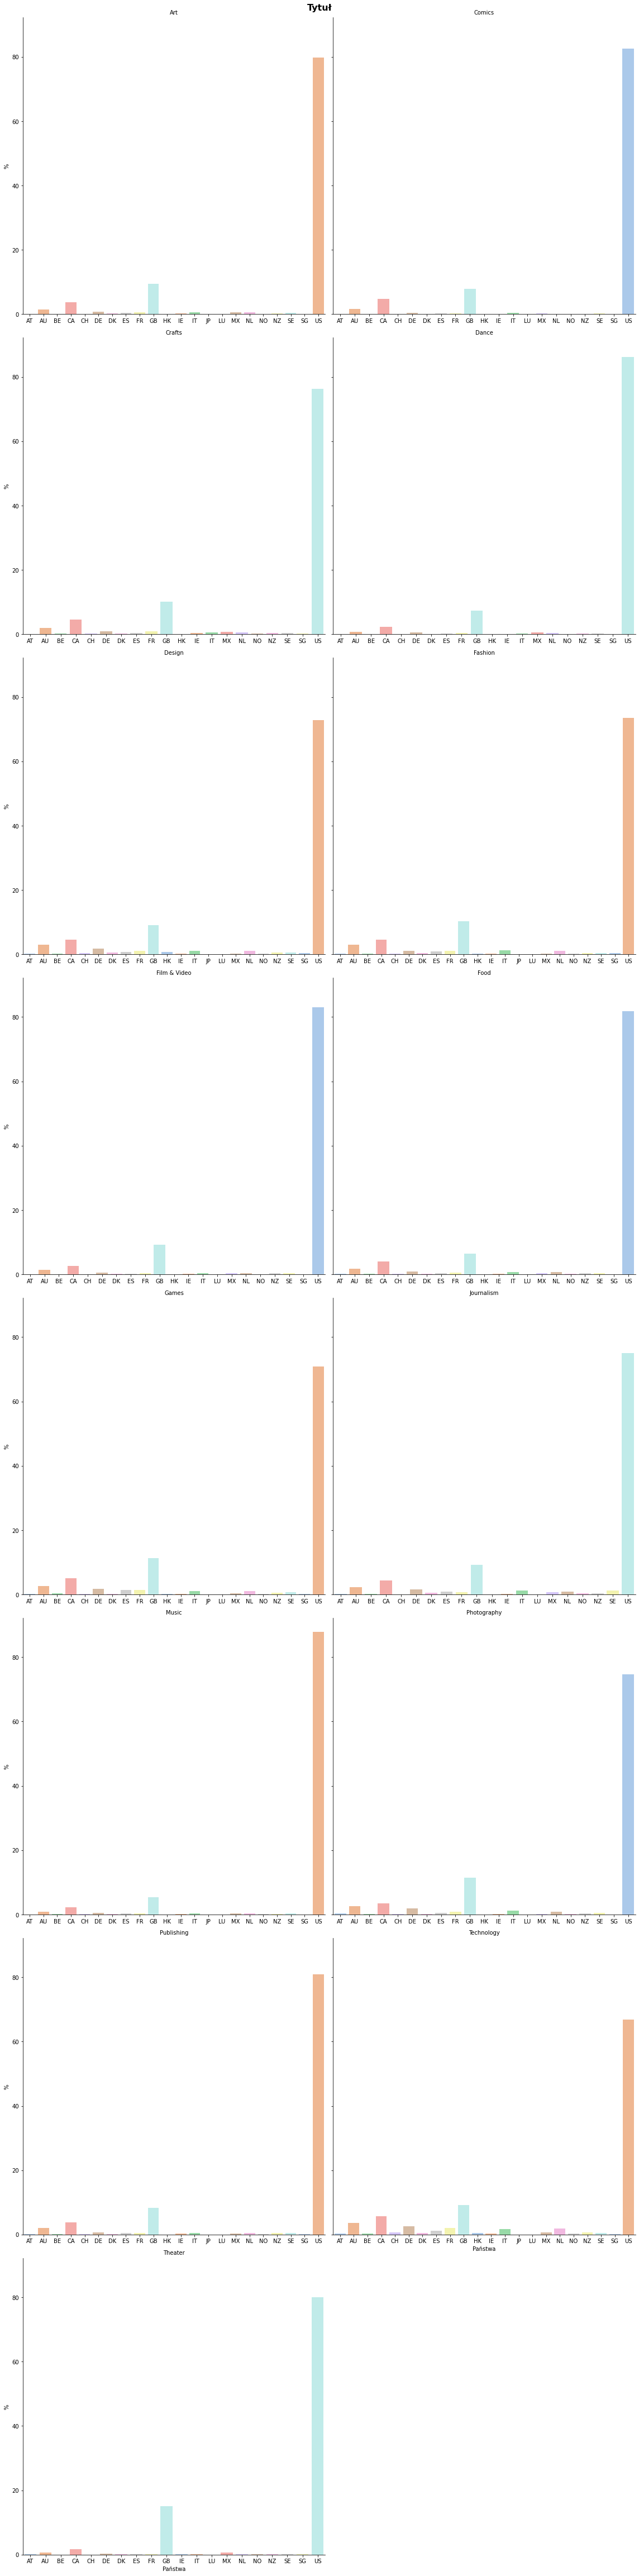

In [ ]:
country_main_category_barplot_pct = barplot_pct(df_clean,['country', 'main_category'], x_label='Państwa', y_label='%', title_fig="Tytuł")

In [ ]:
widget_maincat_country = widget_layout(widget_main_cat, widget_country)
widget_maincat_country

Box(children=(SelectMultiple(description='Kategoria', index=(3, 4, 5, 6, 7), options=('Publishing', 'Film & Vi…

Button(description='Odśwież', style=ButtonStyle())

Output()

f:\Anaconda\envs\projekt_python\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


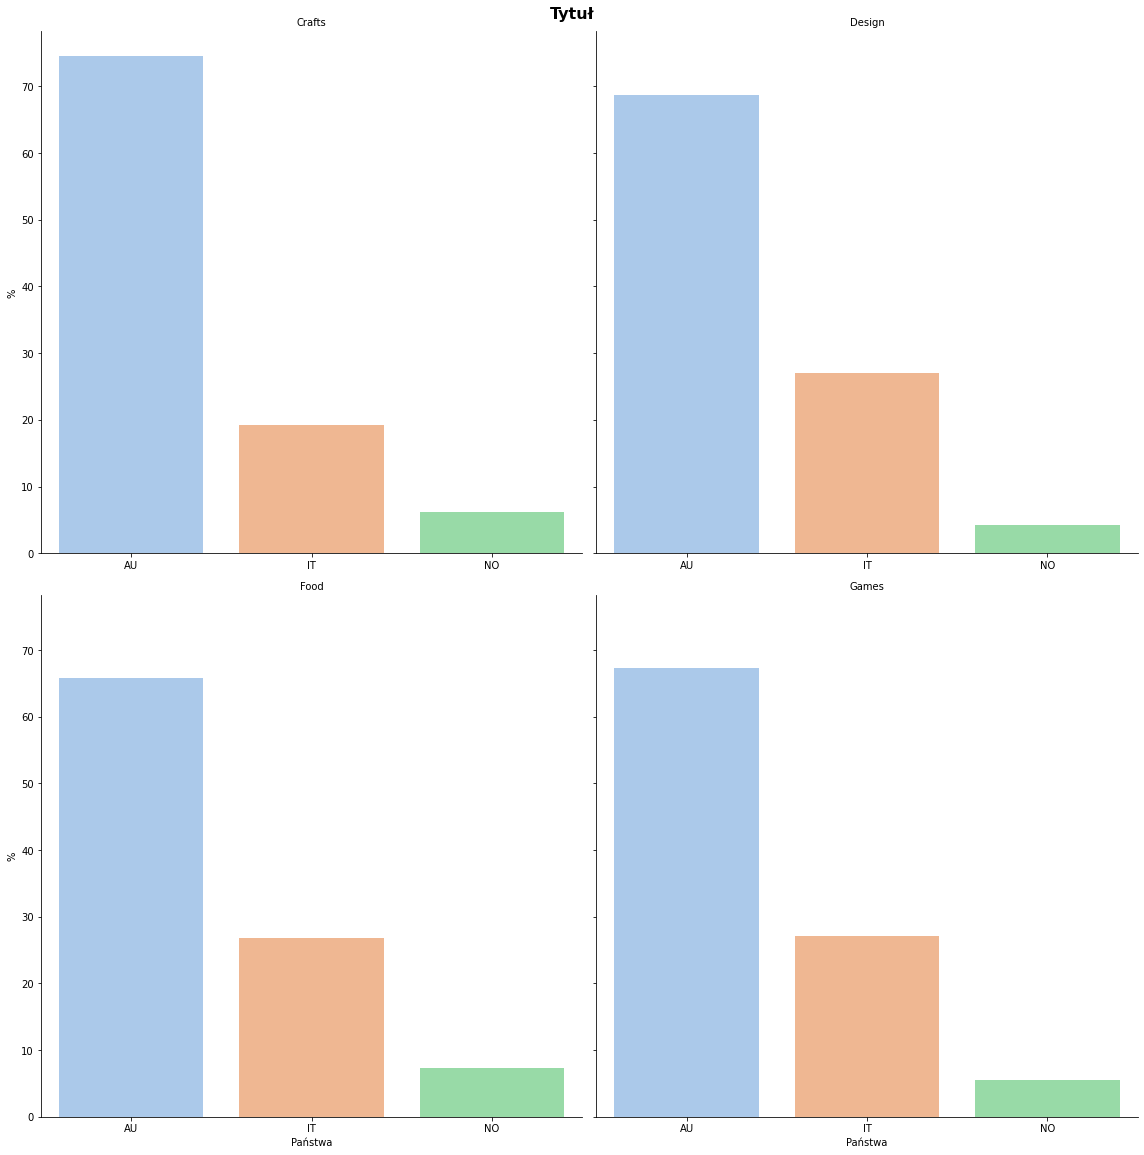

In [ ]:
refresh_button = widgets.Button(description="Odśwież")
output = widgets.Output()


def refresh(b):
    clear_output()
    display(refresh_button, output)
    #tworzę listę wybranych kategorii
    list_wdg_main_category = list(widget_main_cat.value)
    #tworzę listę wybranych lat
    list_wdg_country = list(widget_country.value)
    #Filtruję DF wg wybranych kategorii
    df_new = df_clean[( df_clean['main_category'].isin(list_wdg_main_category) ) & ( df_clean['country'].isin(list_wdg_country) )]
    #Tworzę wykres na podstawie nowego DF
    return barplot_pct(df_new,['country', 'main_category'],  x_label='Państwa', y_label='%', title_fig="Tytuł")

display(refresh_button, output)
refresh_button.on_click(refresh)

f:\Anaconda\envs\projekt_python\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


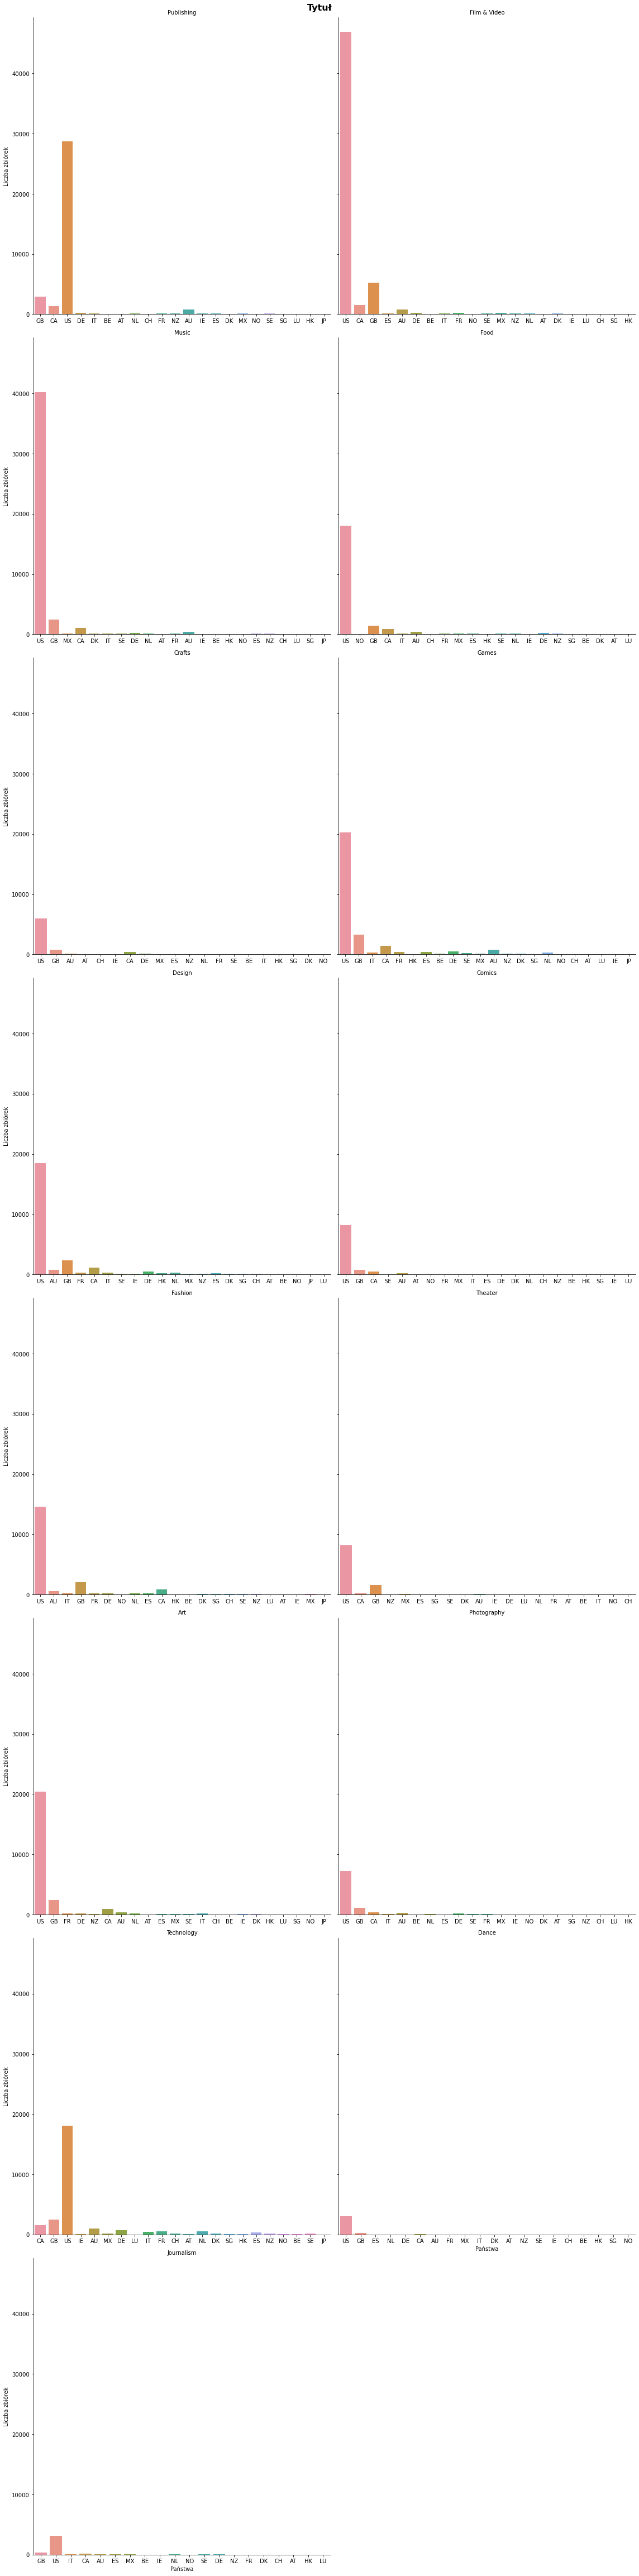

In [ ]:
#Tak wyglądają wszystkie wykresy
country_main_category = count_plot_col(df_clean, 'main_category', 'country', 2,8, x_label="Państwa", y_label='Liczba zbiórek', title_fig='Tytuł')

In [ ]:
widget_maincat_country = widget_layout(widget_main_cat, widget_country)
widget_maincat_country

Box(children=(SelectMultiple(description='Kategoria', index=(3, 4, 5, 6), options=('Publishing', 'Film & Video…

Button(description='Odśwież', style=ButtonStyle())

Output()

f:\Anaconda\envs\projekt_python\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


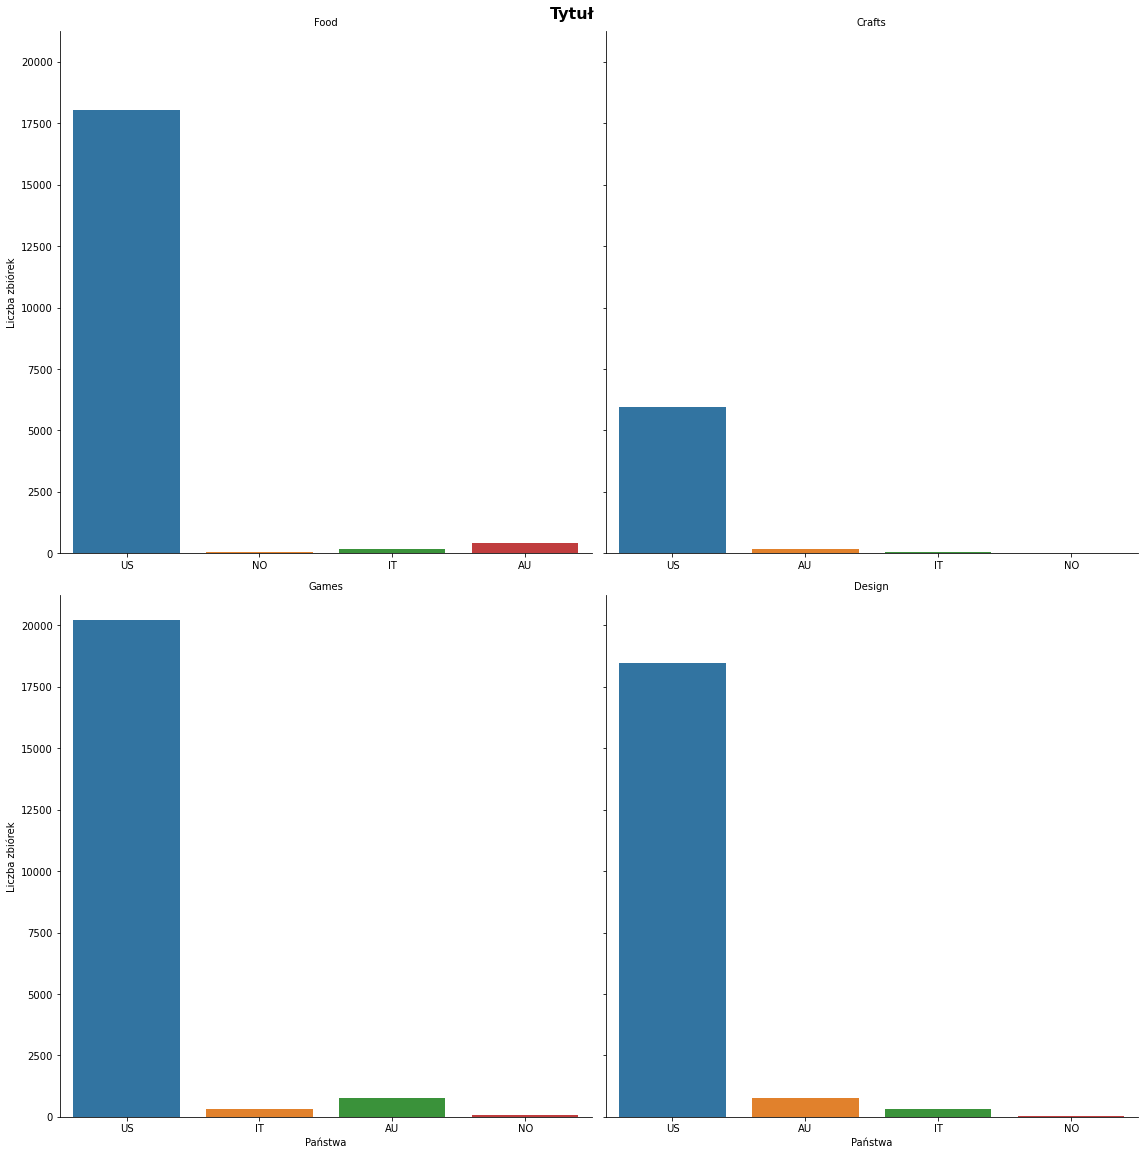

In [ ]:
#Do dorobienia button

refresh_button = widgets.Button(description="Odśwież")
output = widgets.Output()


def refresh(b):
    print(type(b))
    clear_output()
    display(refresh_button, output)
    #tworzę listę wybranych kategorii
    list_wdg_main_category = list(widget_main_cat.value)
    #tworzę listę wybranych lat
    list_wdg_country = list(widget_country.value)
    #Filtruję DF wg wybranych kategorii
    df_new = df_clean[( df_clean['main_category'].isin(list_wdg_main_category) ) & ( df_clean['country'].isin(list_wdg_country) )]
    #Tworzę wykres na podstawie nowego DF
    return count_plot_col(df_new, 'main_category', 'country', 2,8, x_label="Państwa", y_label='Liczba zbiórek', title_fig='Tytuł')

display(refresh_button, output)
refresh_button.on_click(refresh)

##### Mediana zakładanych celów zbiórek na ktegorie i kraj i sukcesy

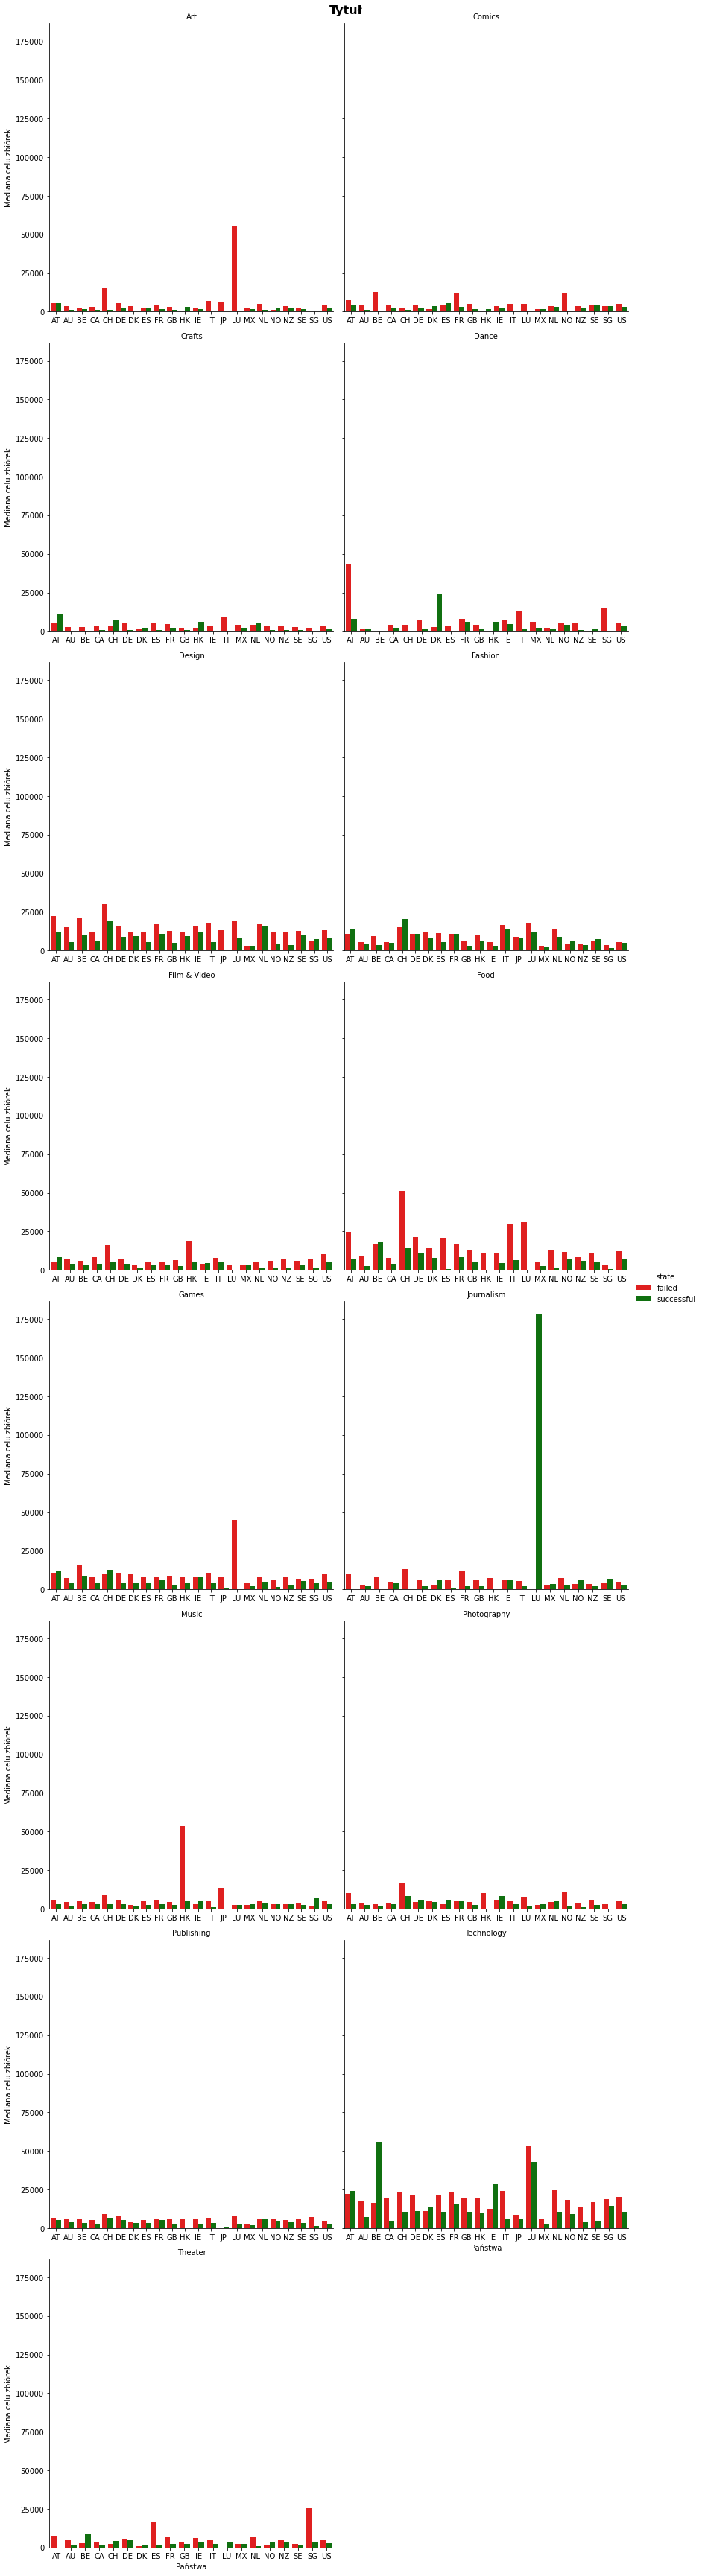

In [ ]:
bar_plot3 = bar_plot_3_var(df_clean, var_col = 'main_category', var_x = 'country', var_y = 'median_x', hue_var = 'state',zmienna_ilosciowa = 'usd_goal_real', palette_list = ['r', 'g'],column_wrap =2, height_value = 6, x_label='Państwa', y_label='Mediana celu zbiórek', title_fig='Tytuł')

In [ ]:
widget_maincat_country = widget_layout(widget_main_cat, widget_country)
widget_maincat_country

Box(children=(SelectMultiple(description='Kategoria', index=(3, 4, 5, 6), options=('Publishing', 'Film & Video…

Button(description='Odśwież', style=ButtonStyle())

Output()

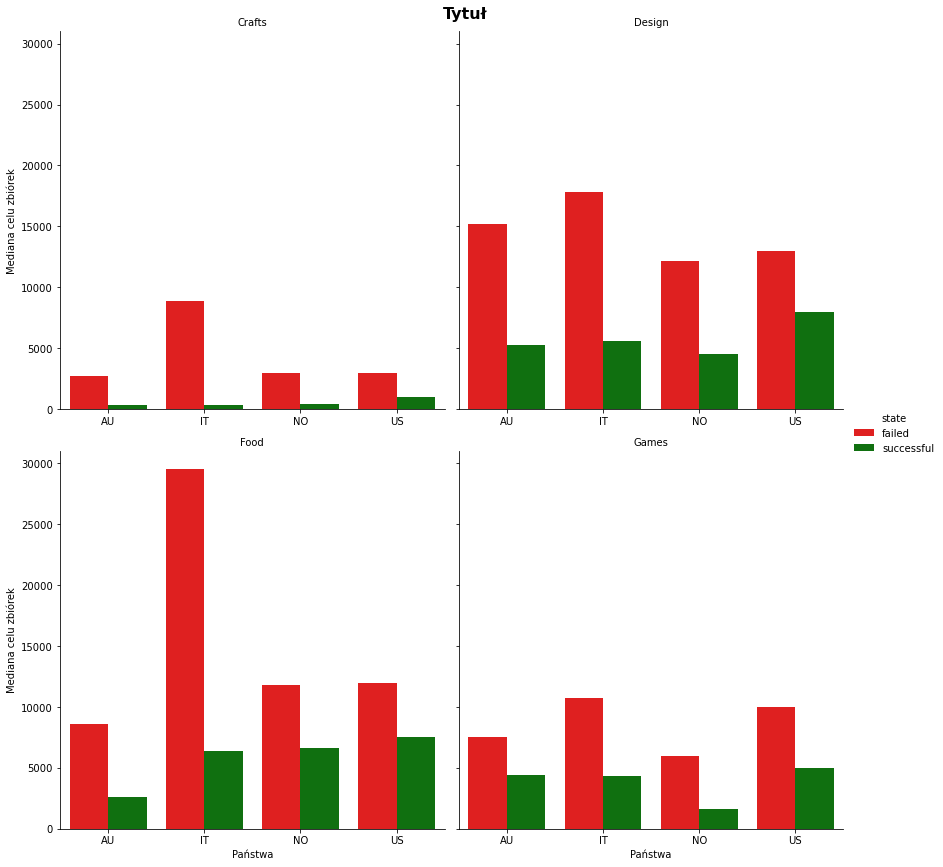

In [ ]:
refresh_button = widgets.Button(description="Odśwież")
output = widgets.Output()


def refresh(b):
    clear_output()
    display(refresh_button, output)
    #tworzę listę wybranych kategorii
    list_wdg_main_category = list(widget_main_cat.value)
    #tworzę listę wybranych lat
    list_wdg_country = list(widget_country.value)
    #Filtruję DF wg wybranych kategorii
    df_new = df_clean[( df_clean['main_category'].isin(list_wdg_main_category) ) & ( df_clean['country'].isin(list_wdg_country) )]
    #Tworzę wykres na podstawie nowego DF
    return bar_plot_3_var(df_new, var_col = 'main_category', var_x = 'country', var_y = 'median_x', hue_var = 'state',zmienna_ilosciowa = 'usd_goal_real', palette_list = ['r', 'g'],column_wrap =2, height_value = 6, x_label='Państwa', y_label='Mediana celu zbiórek', title_fig='Tytuł')

display(refresh_button, output)
refresh_button.on_click(refresh)

***

In [ ]:
#Widget do poniższych wykresów
widget_layout(widget_main_cat, widget_launched_year)

Box(children=(SelectMultiple(description='Kategoria', index=(3, 4, 5, 6), options=('Publishing', 'Film & Video…

Button(description='Odśwież', style=ButtonStyle())

Output()

f:\Anaconda\envs\projekt_python\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


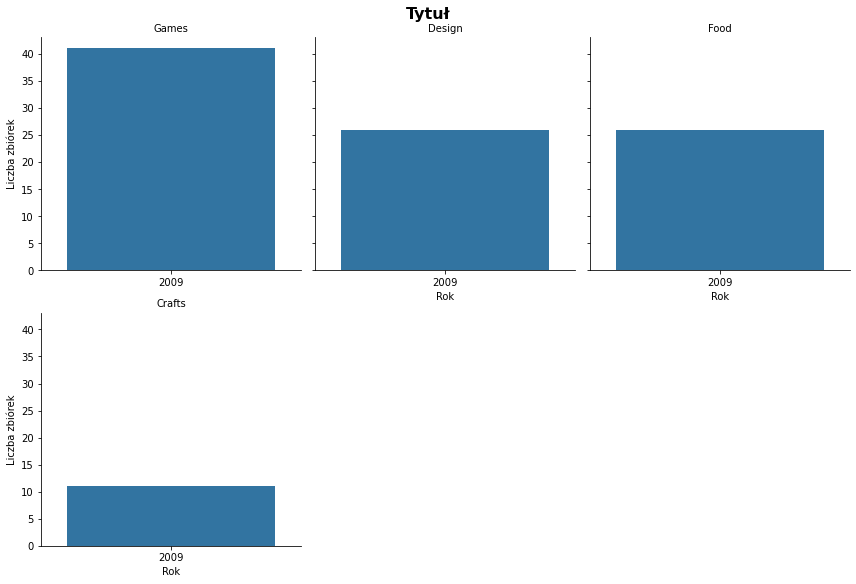

In [ ]:
from matplotlib.pyplot import ylabel


refresh_button = widgets.Button(description="Odśwież")
output = widgets.Output()


def refresh(b):
    clear_output()
    display(refresh_button, output)
    #tworzę listę wybranych kategorii
    list_wdg_main_category = list(widget_main_cat.value)
    #tworzę listę wybranych lat
    list_launched_year = list(widget_launched_year.value)
    #Filtruję DF wg wybranych kategorii
    df_new = df_clean[( df_clean['main_category'].isin(list_wdg_main_category) ) & ( df_clean['launched_year'].isin(list_launched_year) )]
    #Tworzę wykres na podstawie nowego DF
    return count_plot_col(df_new, 'main_category', 'launched_year', x_label='Rok', y_label='Liczba zbiórek', title_fig='Tytuł')

display(refresh_button, output)
refresh_button.on_click(refresh)

***

C:\Users\jozab\anaconda3\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


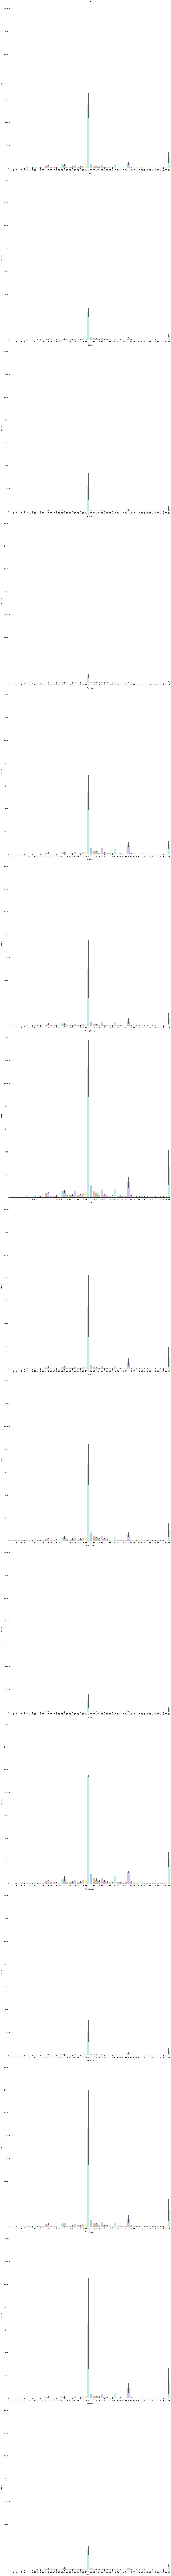

In [ ]:

duration_cat_state = bar_plot_2_var(agg_cat_dur_state, 'main_category', 'duration', 'count_x', 'pastel',column_wrap=1, height_value=15)

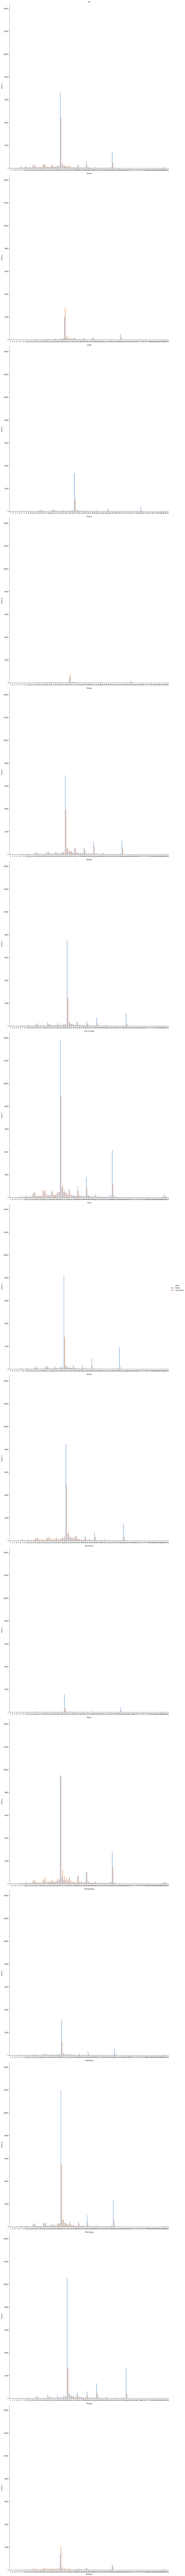

In [ ]:
bar_plot_3_var(df_clean, 'main_category', 'duration', 'count_x', 'state', 'ID', 'pastel', 1, 15)

In [ ]:
widget_maincat_days = widget_layout(widget_main_cat, widget_days)
widget_maincat_days

Box(children=(SelectMultiple(description='Kategoria', index=(0,), options=('Publishing', 'Film & Video', 'Musi…

In [ ]:
refresh_button = widgets.Button(description="Odśwież")
output = widgets.Output()


def refresh(b):
    clear_output()
    display(refresh_button, output)
    #tworzę listę wybranych kategorii
    list_wdg_main_category = list(widget_main_cat.value)
    #tworzę listę wybranych lat
    days_tuple = list(widget_days.value)
    #Filtruję DF wg wybranych kategorii
    df_new = df_clean[( df_clean['main_category'].isin(list_wdg_main_category)) & (df_clean['duration'] >= days_tuple[0]) & (df_clean['duration'] <= days_tuple[1])]
    #Tworzę wykres na podstawie nowego DF
    return bar_plot_3_var(df_new, 'main_category', 'duration', 'count_x', 'state', 'ID', ['r','g'], 1, 15)

display(refresh_button, output)
refresh_button.on_click(refresh)

Button(description='Odśwież', style=ButtonStyle())

Output()

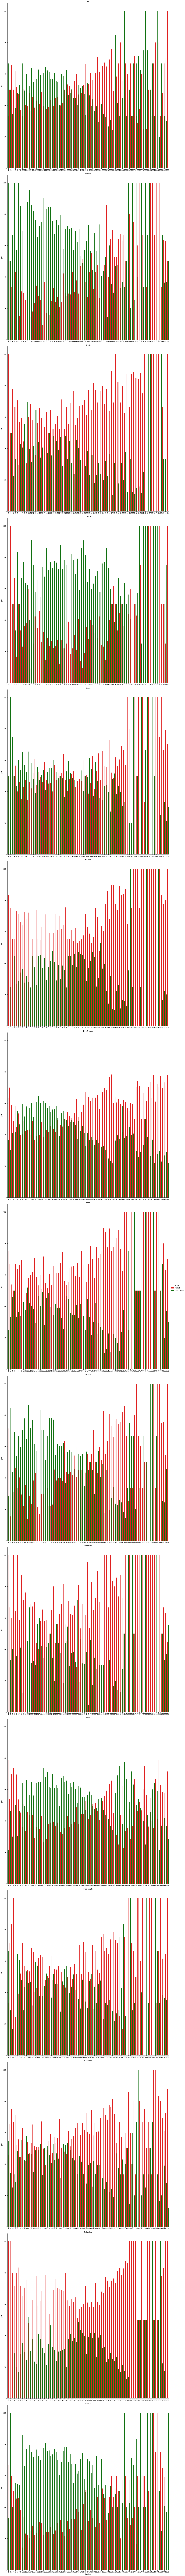

In [ ]:
plot_pct_duration_state = barplot_pct_3_var(df_clean, ['main_category','duration','state'])

In [ ]:
widget_maincat_days = widget_layout(widget_main_cat, widget_days)
widget_maincat_days

Box(children=(SelectMultiple(description='Kategoria', index=(3, 4, 5, 6), options=('Publishing', 'Film & Video…

Button(description='Odśwież', style=ButtonStyle())

Output()

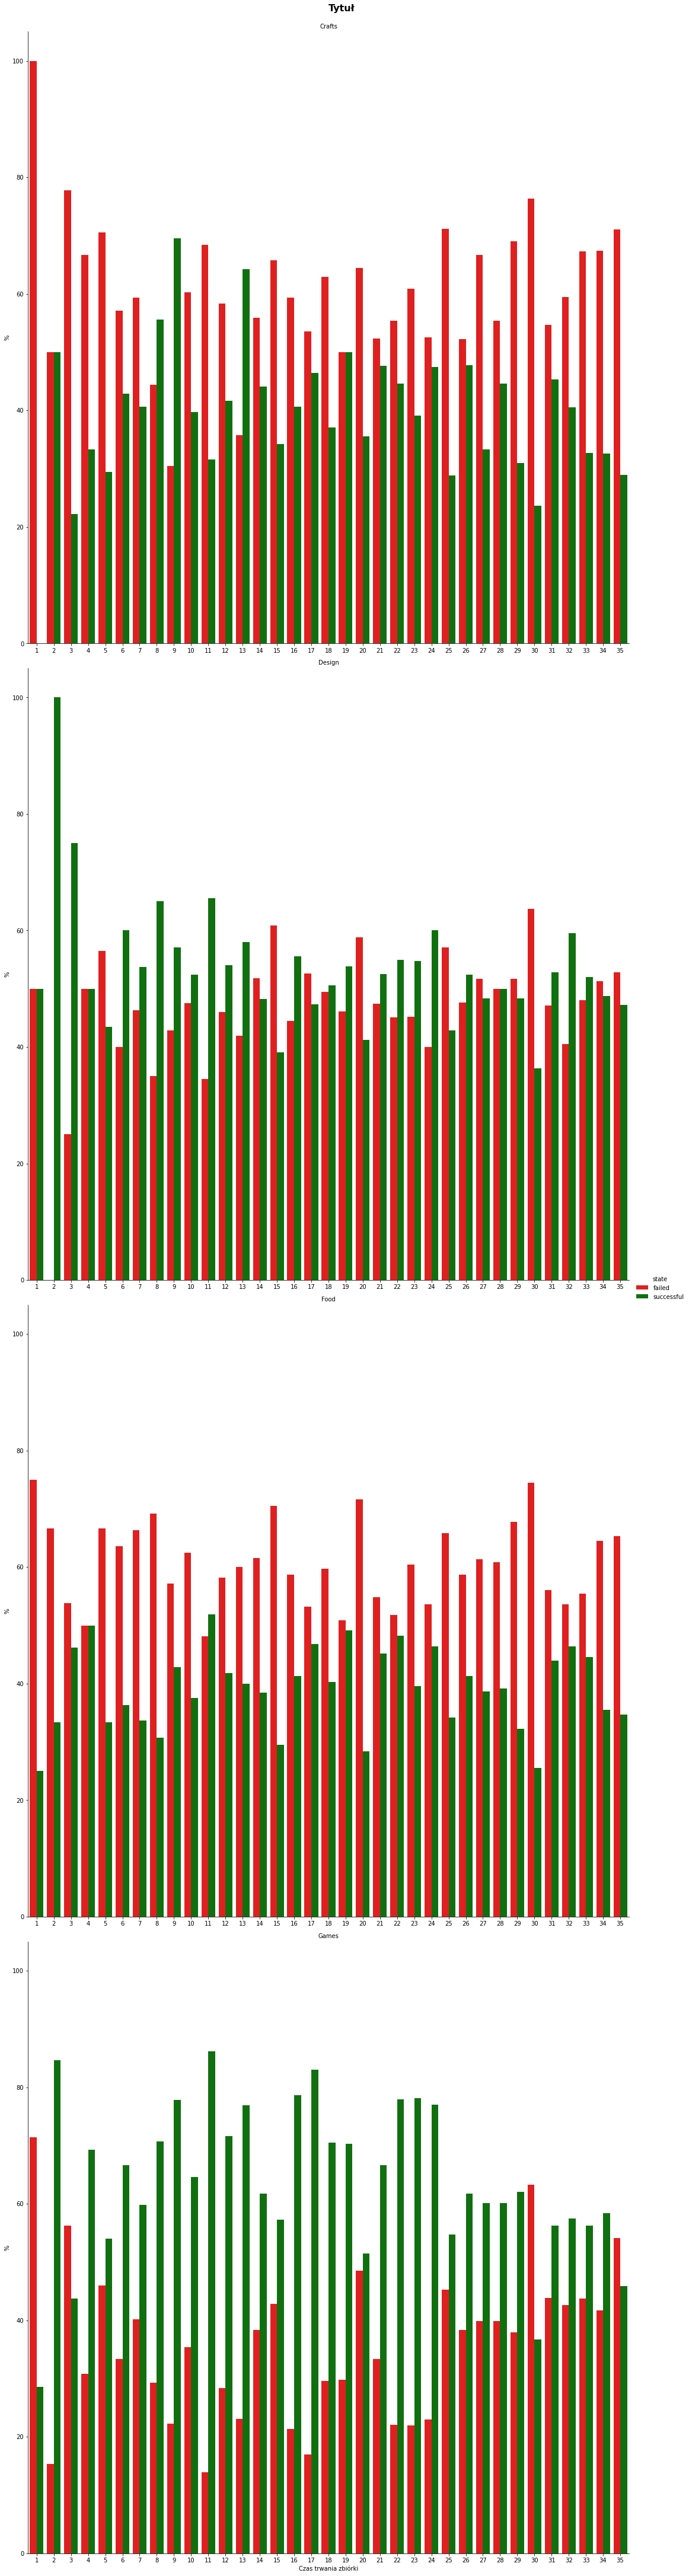

In [ ]:
refresh_button = widgets.Button(description="Odśwież")
output = widgets.Output()


def refresh(b):
    clear_output()
    display(refresh_button, output)
    #tworzę listę wybranych kategorii
    list_wdg_main_category = list(widget_main_cat.value)
    #tworzę listę wybranych lat
    days_tuple = list(widget_days.value)
    #Filtruję DF wg wybranych kategorii
    df_new = df_clean[( df_clean['main_category'].isin(list_wdg_main_category)) & (df_clean['duration'] >= days_tuple[0]) & (df_clean['duration'] <= days_tuple[1])]
    #Tworzę wykres na podstawie nowego DF
    return barplot_pct_3_var(df_new, ['main_category','duration','state'], x_label='Czas trwania zbiórki', y_label='%', title_fig='Tytuł')

display(refresh_button, output)
refresh_button.on_click(refresh)